# Vibrotactile sensation thresholds elicited by a bone vibrator on the mastoid: a literature review

Guido Cattani, 02-01-2023

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def munging_data(fin):
    # read input file, clean and mung data
    data = pd.read_csv(fin)
    data.at [5, 'Unnamed: 1'] = " "                 # ISO string modification to avoid NaN
    study = data ['Unnamed: 0'] + ', ' + data ['Unnamed: 1']   # Concatenate strings
    data.insert(0, 'Study', study)
    data = data.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1)   # Deleate redundant columns
    data = data.drop([7, 8, 10, 12], axis = 0)                 # Deleate SD rows
    return data

In [4]:
def data_to_plot(df):
    # prepare data for plot
    col_names = df.columns.tolist()
    col_names = col_names[1:]
    data_long = pd.melt(df, id_vars='Study', value_vars=col_names, var_name='Frequency [Hz]', 
                        value_name='Vibrotactile_Threshold [dBHL]', 
                        col_level=None, ignore_index=True)
    return data_long

In [5]:
def filter_iso(df_long):
    is_iso = df_long['Study'] == 'ISO 8253-1 2010,  '
    iso_long = df_long[is_iso]
    return iso_long

In [6]:
def show_scatter(df_long):
    # prepare data to plot
    iso_long = filter_iso(df_long)
    df_long.replace(to_replace = 'ISO 8253-1 2010,  ', 
                    value = 'ISO 8253-1 2010, also marked with S', inplace = True)
    # make a scatterplot    
    sns.set_style("whitegrid")
    fig, ax = plt.subplots()

    ax = sns.scatterplot(data=df_long, x=df_long['Frequency [Hz]'], 
                         y=df_long['Vibrotactile_Threshold [dBHL]'], hue=df_long['Study'], 
                         s=100, style=None, palette='colorblind', hue_order=None, 
                         hue_norm=None, sizes=None, size_order=None, size_norm=None, 
                         markers=True, style_order=None, legend='auto', ax=None)
    
    ax.plot(iso_long['Frequency [Hz]'], iso_long['Vibrotactile_Threshold [dBHL]'], linestyle='None', color='black', marker='$S$', markersize=10)
    plt.ylim(reversed(plt.ylim(0, 100))) # reverse y as
    ax.xaxis.set_ticks_position('top')   # place x axes on top
    ax.xaxis.set_label_position('top')   # place x label on top

    # place legend outside plot top right corner
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    
    plt.savefig("/media/guido/LACIE/Beengeleiding/all_papers_vbt.png", 
                dpi=300, bbox_inches = "tight")
    plt.show()

In [7]:
def data_plot(fin):
    data = munging_data(fin)
    data_long = data_to_plot(data)
    show_scatter(data_long)

In [8]:
file_in = "/media/guido/LACIE/Beengeleiding/Data_vibrotactile_thresholds.csv"

In [9]:
# present the data from literature
data = munging_data(file_in)
data

,Study,125,250,500,750,1000,1500,2000
0,"Norber 1964, median, N = 38 + 12",NaN,25.0,50.0,NaN,NaN,NaN,NaN
1,"Harbert 1969, median, N = 38 + 13 + 14",NaN,40.0,60.0,NaN,NaN,NaN,NaN
2,"Boothroyd 1970, median, N = 9",NaN,35.0,60.0,70.0,85.0,NaN,NaN
3,"Norber 1970, mean, experimental group N = 5",NaN,32.0,51.0,NaN,NaN,NaN,NaN
4,"Norber 1970, mean, control groep N=6",NaN,37.0,52.0,NaN,NaN,NaN,NaN
5,"ISO 8253-1 2010,",NaN,40.0,60.0,NaN,70.0,NaN,NaN
6,"Eichenauer 2014, median B71 & B81, N = 20",NaN,35.0,55.0,NaN,75.0,NaN,NaN
9,"Jansson 2017, B71, mean, N = 16",13.0,39.0,62.0,70.0,72.0,81.0,87.0
11,"Jansson 2017, B81, mean, N = 16",17.0,40.0,63.0,71.0,72.0,79.0,84.0
13,"Martin & Wittich 1966, ?",NaN,45.0,70.0,NaN,80.0,NaN,NaN


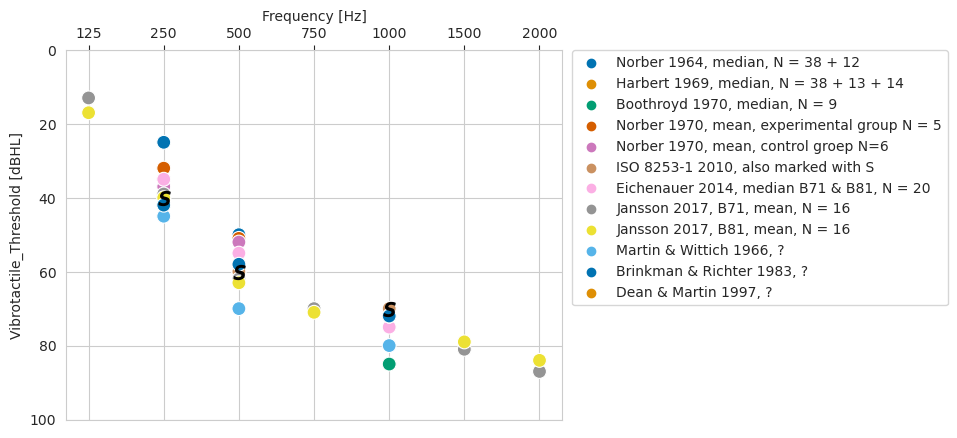

In [10]:
# make a scatterplot of vibrotactile sensation thresholds from literature
data_plot(file_in)